<a href="https://colab.research.google.com/github/Tetencha/data/blob/main/DDS_Clase_6_taller_inferencia_solucion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taller de Inferencia

**Diplomado en Data Science Versión 2023** <br>
**Facultad de Matemáticas**<br>
**Pontificia Universidad Católica de Chile**

---

## Problemas con el uso de la Tarjeta Compra Más (TCM)

Usted, como *Data Scientist* se desempeña en una empresa del Retail donde, como experto, tiene como labor determinar las áreas débiles y fuertes a identificar y proponer mejoras.

En una reunión (tormenta de ideas) se determina que el uso de nuestra tarjeta presenta áreas de mejora en varios aspectos. Sin embargo, es necesario verificar o refutar las apreciaciones que, durante la reunión, se plantearon sobre la TCM. Estás se pueden indexar como sigue:

* **Montos**: El comité de promociones discute que ellos han focalizado apropiadamente las ofertas, de tal
forma que han logrado incrementar los montos de compras mensuales, y para comprobar indican que en 2021 fue de \$1.250.000 en promedio, asegurando que en 2022 debe ser superior.
* **Antigüedad**: El área de fidelización de clientes (renegociación) es acusada de impedir que antiguos clientes incrementen sus compras al limitar sus niveles de endeudamiento. En otras palabras, entre los que usan la tarjeta, los clientes antiguos tiene montos medios \$100.000 menor que los clientes nuevos (las tarjetas de los clientes identificados cón números menores a 250.000 corresponden a clientes antiguos).


Su trabajo será, mediante análisis de datos mediante tablas, gráficos y test de hipótesis, estudiar los puntos anteriores. Para el cumplimiento de lo anterior, el Departamento de Informática les hace llegar una pequeña muestra aleatoria simple de clientes con información histórica y los atributos solicitados (ver `TCM2022.xlsx`). Las variables de la muestra son las siguientes:

* `Cliente`: código de identificación del cliente – asociada a la fecha de otorgamiento.
* `Edad`: en años actualizada a diciembre 2022.
* `Sexo`: F (femenino), M (masculino).
* `Region`: Indica si el cliente pertenece a la región metropolitana (RM) o no (No RM).
* `Uso2022`: 1 si ha usado la tarjeta durante 2022, 0 si solo la ha usado en 2021.
* `Monto2022`: Monto total en compras desde enero a diciembre de 2022 (en miles).

> En los ejercicios que se pida realizar test de hipótesis,  **escriba a mano la Hipótesis Nula correspondiente** antes de realizar el test en `python`.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("seaborn-whitegrid")
plt.rcParams["figure.figsize"] = (10, 8)
%config InlineBackend.figure_format = 'retina'

<ipython-input-3-3ebdcaf0e33b>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [ ]:
!wget https://raw.githubusercontent.com/estebanrucan/bases-de-datos/main/TCM2022.xlsx

--2023-06-13 01:26:20--  https://raw.githubusercontent.com/estebanrucan/bases-de-datos/main/TCM2022.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17783 (17K) [application/octet-stream]
Saving to: ‘TCM2022.xlsx’

TCM2022.xlsx        100%[===================>]  17.37K  --.-KB/s    in 0s      

2023-06-13 01:26:20 (90.2 MB/s) - ‘TCM2022.xlsx’ saved [17783/17783]



**1.** Cargue la base de datos y realice un análisis inicial. ¿Hay presencia de datos faltantes? Realice un histograma para la variable `Monto2022` y descríbalo.

In [ ]:
data = pd.read_excel("TCM2022.xlsx")
display(data.head())

,Cliente,Edad,Sexo,Region,Uso2022,Monto2022
0,1367,72,M,RM,0,0
1,1730,53,M,RM,1,1124
2,1824,54,F,RM,0,0
3,3058,61,M,RM,0,0
4,5321,59,M,RM,0,0


In [ ]:
data.shape

(450, 6)

In [ ]:
data.info() # no hay faltantes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Cliente    450 non-null    int64 
 1   Edad       450 non-null    int64 
 2   Sexo       450 non-null    object
 3   Region     450 non-null    object
 4   Uso2022    450 non-null    int64 
 5   Monto2022  450 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 21.2+ KB


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Cliente,450.0,255996.060000,143676.428194,1367.0,128283.75,262712.0,379385.75,499908.0
Edad,450.0,47.064444,11.794183,18.0,38.00,47.0,55.75,75.0
Uso2022,450.0,0.582222,0.493742,0.0,0.00,1.0,1.00,1.0
Monto2022,450.0,704.113333,729.740777,0.0,0.00,581.0,1297.50,2717.0


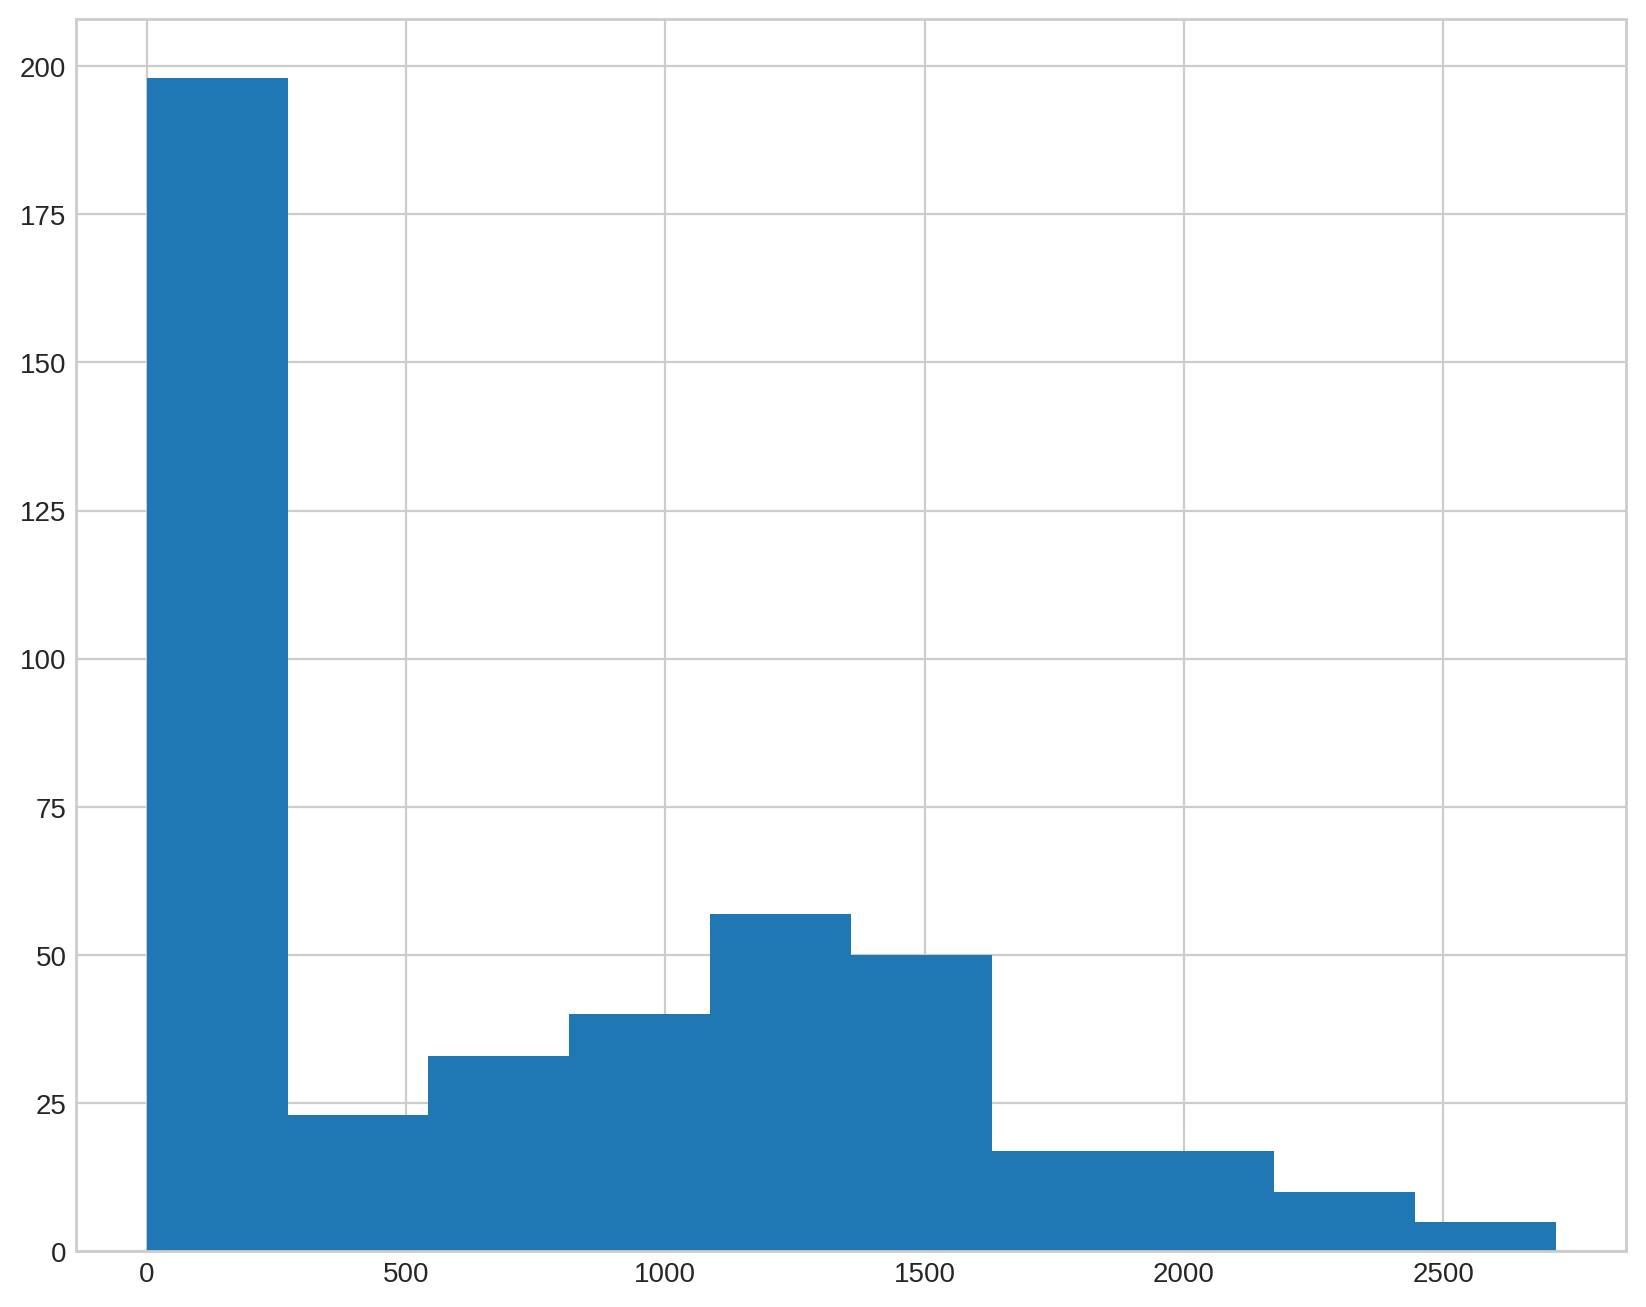

In [ ]:
plt.hist(data["Monto2022"]); # Muchos valores están al comienzo
# Esto se debe a que no todas las personas realizaron compras en 2022
# la media sin considerar estas personas es aprox. 1250

**2.** Muestre mediante una tabla, la cantidad y distribución de porcentajes de clientes que usaron la tarjeta durante 2021 y 2022. A través de esta tabla construya un gráfico de barras que muestre la cantidad de clientes por año.

In [ ]:
tabla1 = data["Uso2022"].value_counts()
tabla2 = data["Uso2022"].value_counts(normalize=True)
pd.concat([tabla1, tabla2], axis=1)

,Uso2022,Uso2022
1,262,0.582222
0,188,0.417778


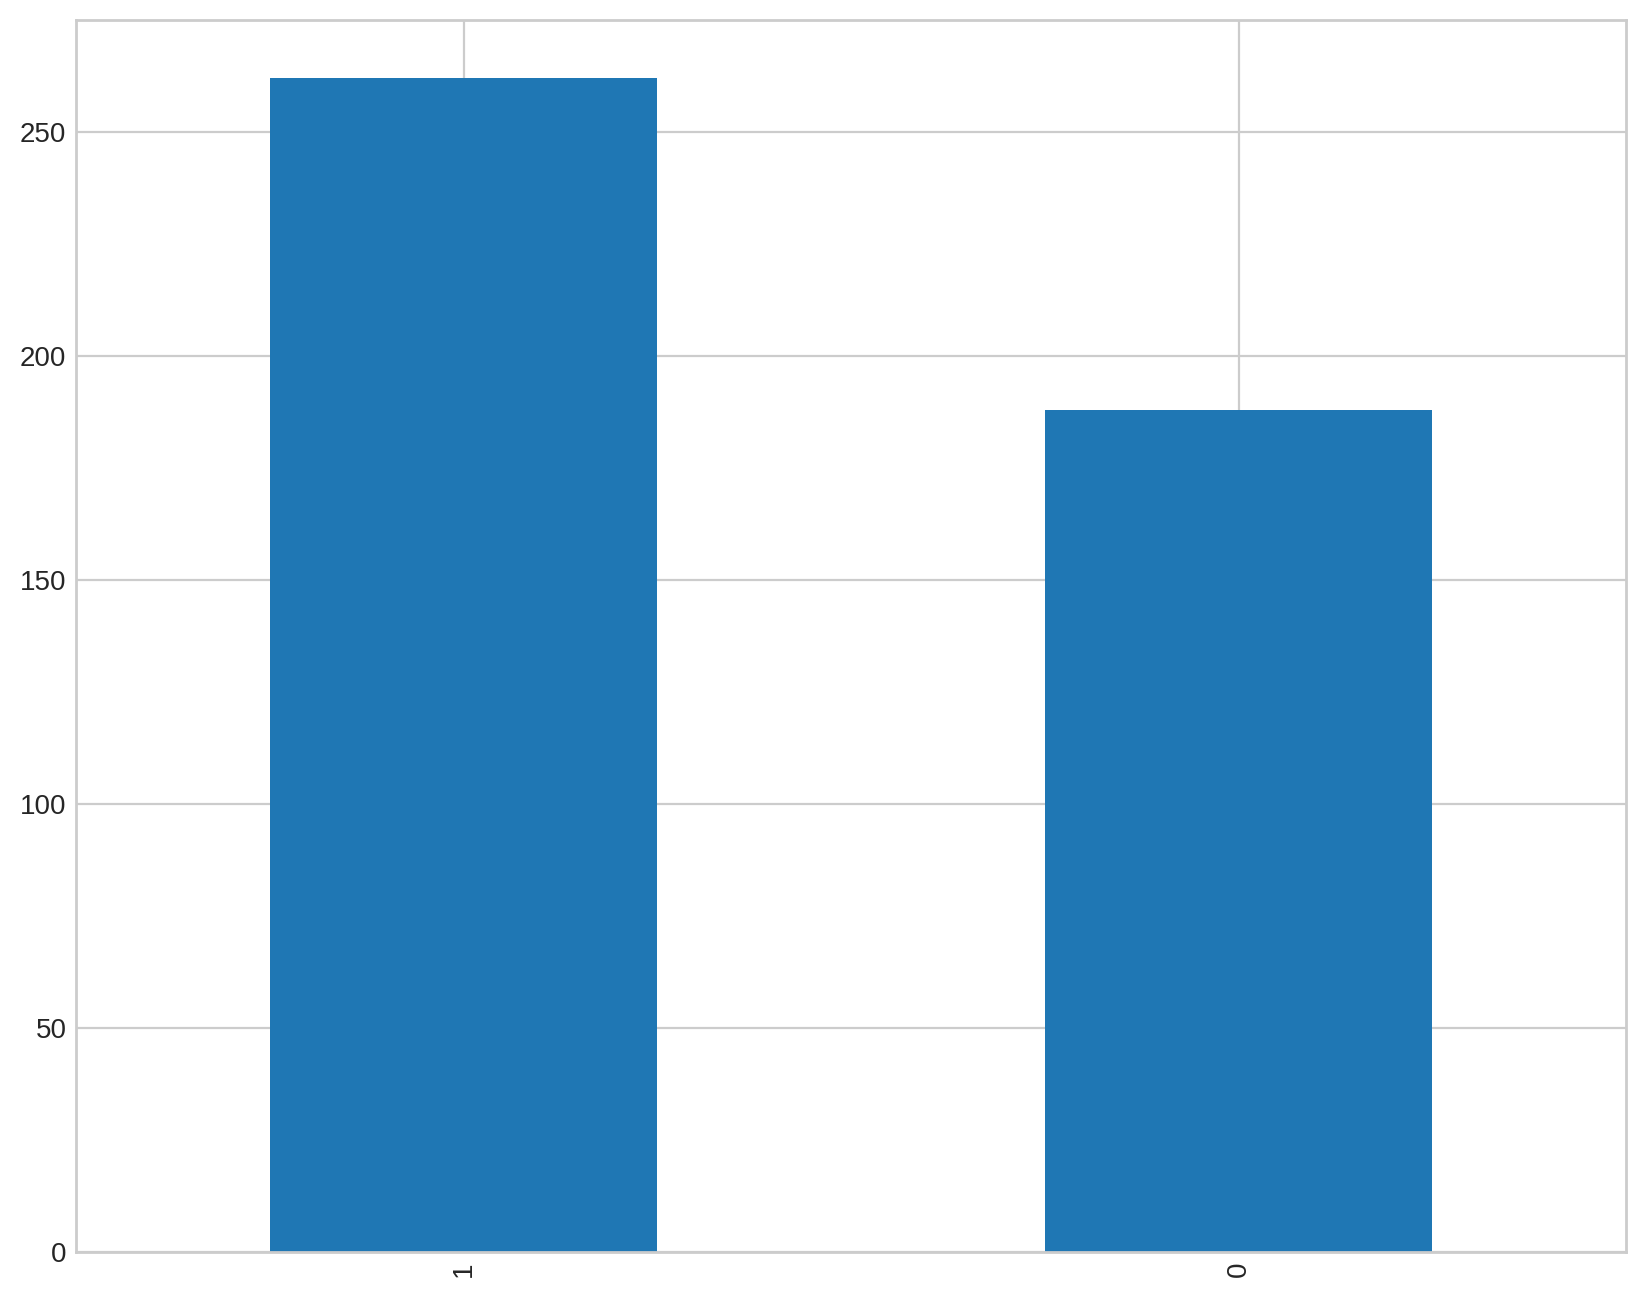

In [ ]:
tabla1.plot(kind="bar");

**3.** Genere una tabla que muestre la media del Monto de 2022 según Región. ¿Nota diferencias? Comente una estrategia robusta para estudiar la validez a nivel poblacional de esta diferencia o igualdad de medias (también recuerde que trabaja con una muestra aleatoria simple sobre la población de clientes).

In [ ]:
data.query("Uso2022 == 1").groupby(["Region"]).agg({"Monto2022": "mean"})
# Sería interesante un test-t para comparar estas medias mediante test de hipótesis

,Monto2022
Region,
No RM,1207.697183
RM,1211.316667


**4.** Estudie la hipótesis planteada sobre los **Montos**. ¿Se rechaza o no se rechaza $H_0$? ¿Como se interpreta este resultado bajo el contexto de la problemática? Trabaje con un 5% de nivel de significancia.

$$
\begin{align}
H_0&: \mu_\text{2022} \leq 1250 \\
H_1&: \mu_\text{2022} > 1250
\end{align}
$$

In [ ]:
from scipy.stats import ttest_1samp # porque la varianza es desconocida
mu_0 = 1150
muestra = data.query("Uso2022 == 1")["Monto2022"]

test = ttest_1samp(
    a           = muestra,
    popmean     = mu_0,
    alternative = "greater"
)
print(test)
# valor-p indica discordancia entre H_0 y datos, o sea se rechaza H_0
# Significa que existe evidencia hacia que media pobl. > 1150 miles

Ttest_1sampResult(statistic=1.7461064951071676, pvalue=0.040984503444368575)


In [ ]:
test.confidence_interval(confidence_level = 0.95)

ConfidenceInterval(low=1153.2426965411962, high=inf)

**5.** Realice el paso anterior pero ahora para la hipótesis sobre **Antiguedad**.

$$
\begin{align}
H_0&: \mu_\text{nuevos} - \mu_\text{antiguos} = 100 \\
H_1&: \mu_\text{nuevos} - \mu_\text{antiguos} \not= 100
\end{align}
$$

In [ ]:
muestra_antiguos = data.query("Cliente < 250000 & Uso2022 == 1")["Monto2022"]
muestra_nuevos = data.query("Cliente >= 250000 & Uso2022 == 1")["Monto2022"]

# H0: nuevos - antiguos = 100
# de otra forma: nuevos - (antiguos + 100) = 0


from scipy.stats import ttest_ind

test = ttest_ind(
    a           = muestra_nuevos,
    b           = muestra_antiguos + 100,
    alternative = "two-sided"
)
print(test)
# el valor-p indica que existe concordancia entre H_0 y las muestras, no se rechaza H_0
# Existe evidencia hacia que si existe esta diferencia de 100 millones.

Ttest_indResult(statistic=0.35688209615957206, pvalue=0.7214695457084487)


**6.** Ahora, calcule la varianza de las muestras anteriores. Luego, estudie si existe igualdad de varianzas a nivel de población en las muestras del ejercicio anterior utilizando un 95% de confianza. Interprete el resultado de acuerdo al contexto de la problemática ¿Cuál es su impacto?

$$
\begin{align}
H_0&: {\sigma^2_\text{max} \over \sigma^2_\text{min}} = 1 \\
H_1&: {\sigma^2_\text{max} \over \sigma^2_\text{min}} > 1
\end{align}
$$

In [ ]:
from scipy.stats import f

if muestra_antiguos.var() > muestra_nuevos.var():
    mayor = "Antiguos"
    var_min = muestra_nuevos.var()
    var_max = muestra_antiguos.var()
    df_min  =  muestra_nuevos.shape[0]
    df_max  =  muestra_antiguos.shape[0]
else:
    mayor = "Nuevos"
    var_min = muestra_antiguos.var()
    var_max = muestra_nuevos.var()
    df_min  =  muestra_nuevos.shape[0]
    df_max  =  muestra_antiguos.shape[0]

F = var_max / var_min
valor_p = 1 - f(df_max, df_min).cdf(F)
print("Varianza mayor:", mayor)
print("Valor-p:", valor_p)

# que el valor-p sea menor a 0.05 implica que
# hay una discordancia entre los datos y H_0
# lo que entrega evidencia hacia que a nivel poblacional
# puede ser mayor la varianza del monto de los clientes antiguos.
# Esto significaría que la dispersión del monto usado en 2022
# respecto a su respectiva media es distinta en ambos tipos de clientes.
# En otras palabras, los clientes más nuevos pueden tener un comportamiento
# más similar respecto a los antiguos a nivel poblacional (al tener menor varianza muestral).

Varianza mayor: Nuevos
Valor-p: 0.013344185441650835


**7.** Para mayor facilidad en la interpretación, se desea estudiar si del total de clientes, el 60% ha usado la tarjeta el año 2022. Realice el test correspondiente usando un 95% de confianza e interprete los resultados en el contexto del problema.

$$
\begin{align}
H_0&: p = 0.6 \\
H_1&: p \not = 0.6
\end{align}
$$

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

x = data.query("Uso2022 == 1").shape[0]
n = data.shape[0]
print(x / n)

estadistico, valor_p = proportions_ztest(
    count = x,
    nobs  = n,
    value = 0.6
)

print(valor_p)

# El valor-p indica que hay concordancia entre H_0 y los datos
# Lo que significa que hay evidencia hacia que la proporción
# de personas a nivel poblacional que ha usado la tarjeta en 2022
# sería de un 60%

0.5822222222222222
0.4444758124855457
